# 1. Import and Install Dependencies

In [2]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
cap=cap = cv2.VideoCapture(0)
# Set mediapipe model 

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()
    cv2.imshow('OpenCV Feed', frame)
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 2. Keypoints using MP Holistic

In [3]:
# 引入model
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
# BGR opencv
# to RBG in order to  use mediapipe
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [16]:
mp_holistic.POSE_CONNECTIONS
# mp_drawing.draw_landmarks??

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [6]:
# 修改landmarks顏色
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [5]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [27]:
draw_landmarks(frame, results)

In [11]:
# results.face_landmarks  return the position of face node 
# results.left_hand_landmarks return the position of left hand node
# if 取length 告訴你有幾個點

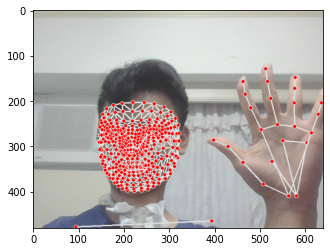

In [28]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# 因為imshow 預設是BGR

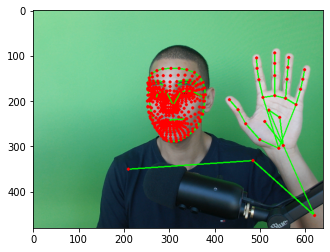

In [31]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [114]:
len(results.left_hand_landmarks.landmark)

21

In [7]:
# 將骨幹的x、y、z記錄下來 之後放進model
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [8]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()

NameError: name 'results' is not defined

In [43]:
pose.shape


(132,)

# flatten()用於攤平數據 方便lstm操作
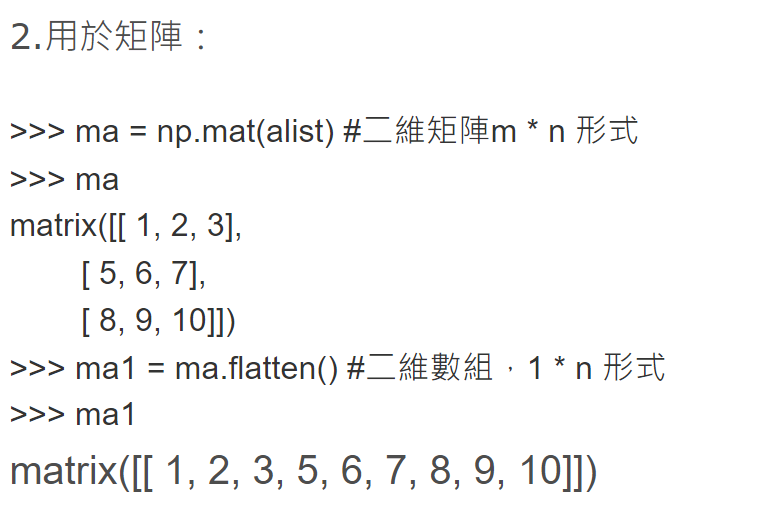

# 如果骨架沒值要補0進去 數目要依據節點數=pose.shape or len(results.left_hand_landmarks.landmark)


In [9]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [45]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [8]:
result_test = extract_keypoints(results)

In [9]:
result_test

array([ 0.42570585,  0.42879403, -1.17800784, ...,  0.        ,
        0.        ,  0.        ])

In [10]:
# save nunpy array
np.save('0', result_test)

In [11]:
np.load('0.npy')

array([ 0.42570585,  0.42879403, -1.17800784, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [12]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'you_died', 'rock'])

# Thirty videos worth of data
#用30幀數所以一個序列有30*1662(骨架節點數)筆資料
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

# 創建資料夾 os.makedirs 有hello', 'thanks', 'iloveyou三個分類每個分類又有30個資料夾(因為幀數=30)

In [14]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [10]:
# for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#         except:
#             pass


# 5. Collect Keypoint Values for Training and Testing

In [16]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
        # read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
    #             print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                if frame_num == 0: #代表一開始
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(1000) #先暫停1s 以免抓到不必要的data
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                keypoints = extract_keypoints(results) # get node x y z 
                npy_path = os.path.join(DATA_PATH, action ,str(sequence),str(frame_num)) #select your save path
                np.save(npy_path,keypoints) # save your data
                # Show to screen
                cv2.imshow('OpenCV Feed', image)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

# 當掉時可用來清除cap

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [35]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(start_folder, start_folder+no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(500)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [16]:
from sklearn.model_selection import train_test_split # to split test and train
from tensorflow.keras.utils import to_categorical # to categorical data

In [17]:
label_map = {label:num for num, label in enumerate(actions)} # label data

In [18]:
label_map

{'hello': 0, 'you_died': 1, 'rock': 2}

# labeling each data

In [37]:

sequences, labels = [], []
for action in actions: # 動作
    for sequence in range(no_sequences): # 影片
        window = []
        for frame_num in range(sequence_length): # frame 
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
#             print(action,res.shape)
            window.append(res) #關節點數的資料
#             print(len(window[0]))
#         print(len(window)) #frame x 關節點
        sequences.append(window)
#         print(len(sequences[0][0]))#影片數目 x frame x 關節點
        labels.append(label_map[action])
        print(labels) #Each vedio to label

[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\hello\\15\\15.npy'

In [11]:
# sequences, labels = [], []
# for action in actions:
#     for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
#         window = []
#         for frame_num in range(sequence_length):
#             res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
#             window.append(res)
#         sequences.append(window)
#         labels.append(label_map[action])

In [21]:
# 90 個video 有 30 frame 1662個骨架
np.array(sequences).shape

(90, 30, 1662)

In [22]:
np.array(labels).shape

(90,)

In [23]:
X = np.array(sequences)

In [24]:
X.shape

(90, 30, 1662)

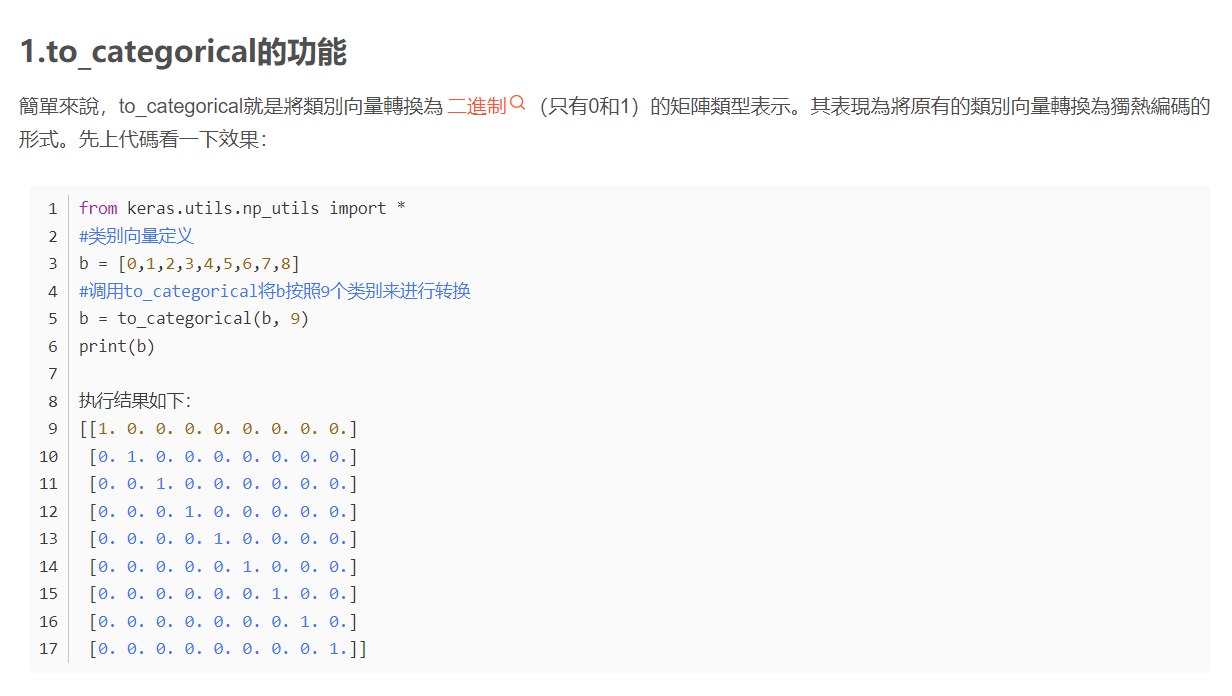

In [27]:
y = to_categorical(labels).astype(int)

In [29]:
y,labels

(array([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 

## 95 : 5

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85, 30, 1662), (5, 30, 1662), (85, 3), (5, 3))

# 7. Build and Train LSTM Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

TensorBoard 視覺化training結果

In [34]:
from tensorflow.keras.callbacks import TensorBoard
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

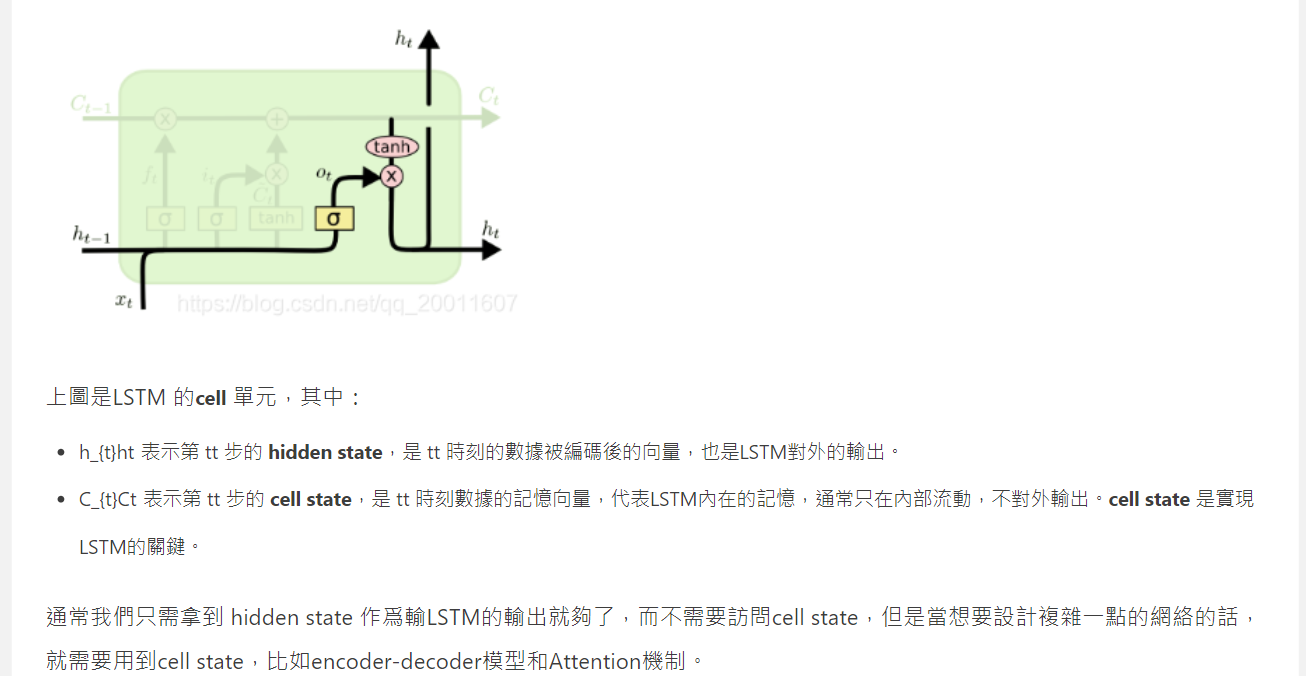

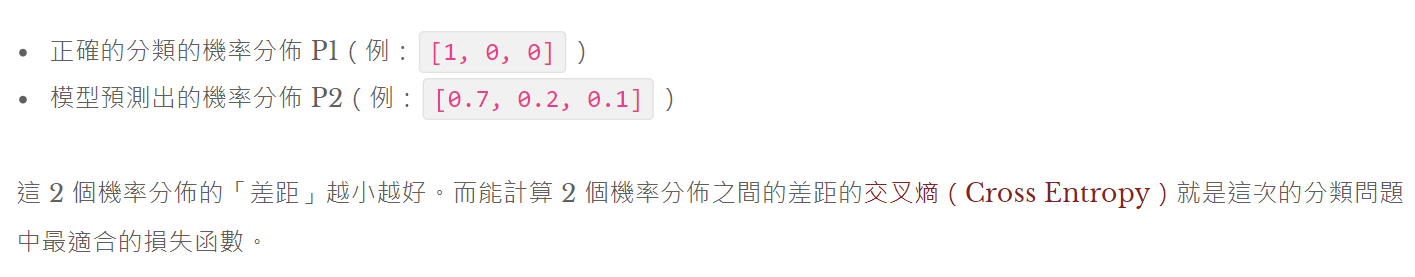

In [35]:
#tanh
#when model is overfitting use Dropout or residual殘差學習
# or Data augmentation、 increse batch size 
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #frame 骨架node數
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu')) # cell state
#  fully connection 全連接層
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
actions.shape[0]

3

In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

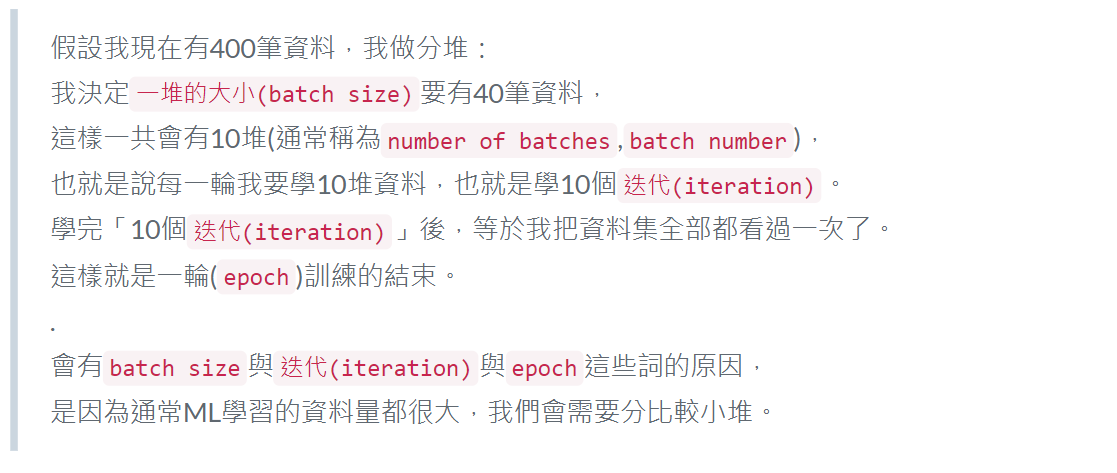
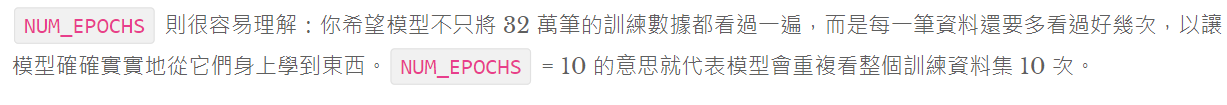

In [38]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 189ms/step - loss: 1.5759 - categorical_accuracy: 0.3601
Epoch 2/2000
3/3 [==============================] - 0s 46ms/step - loss: 2.5030 - categorical_accuracy: 0.2701
Epoch 3/2000
3/3 [==============================] - 0s 46ms/step - loss: 3.5092 - categorical_accuracy: 0.3934
Epoch 4/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.1117 - categorical_accuracy: 0.2779
Epoch 5/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0989 - categorical_accuracy: 0.3210
Epoch 6/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0402 - categorical_accuracy: 0.4463
Epoch 7/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0352 - categorical_accuracy: 0.4677
Epoch 8/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.3167 - categorical_accuracy: 0.2799
Epoch 9/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.2089 - categorical_accuracy: 0.3777


3/3 [==============================] - 0s 48ms/step - loss: 1.0960 - categorical_accuracy: 0.3679
Epoch 147/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0973 - categorical_accuracy: 0.3405
Epoch 148/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0945 - categorical_accuracy: 0.3952
Epoch 149/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0963 - categorical_accuracy: 0.3718
Epoch 150/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.0986 - categorical_accuracy: 0.3718
Epoch 151/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.1007 - categorical_accuracy: 0.3210
Epoch 152/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.0982 - categorical_accuracy: 0.3796
Epoch 153/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0966 - categorical_accuracy: 0.3640
Epoch 154/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.1001 - categorical_accuracy: 0.321

3/3 [==============================] - 0s 44ms/step - loss: 1.0987 - categorical_accuracy: 0.3288
Epoch 291/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0991 - categorical_accuracy: 0.3170
Epoch 292/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0971 - categorical_accuracy: 0.3366
Epoch 293/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.1013 - categorical_accuracy: 0.3249
Epoch 294/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0984 - categorical_accuracy: 0.3327
Epoch 295/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0993 - categorical_accuracy: 0.3092
Epoch 296/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0982 - categorical_accuracy: 0.3170
Epoch 297/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0987 - categorical_accuracy: 0.3210
Epoch 298/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.1021 - categorical_accuracy: 0.293

3/3 [==============================] - 0s 48ms/step - loss: 1.0971 - categorical_accuracy: 0.3483
Epoch 435/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0985 - categorical_accuracy: 0.3562
Epoch 436/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0970 - categorical_accuracy: 0.3562
Epoch 437/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.1014 - categorical_accuracy: 0.3093
Epoch 438/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0965 - categorical_accuracy: 0.3483
Epoch 439/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0998 - categorical_accuracy: 0.3327
Epoch 440/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0942 - categorical_accuracy: 0.3796
Epoch 441/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0955 - categorical_accuracy: 0.3796
Epoch 442/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.1004 - categorical_accuracy: 0.328

3/3 [==============================] - 0s 44ms/step - loss: 1.0915 - categorical_accuracy: 0.4030
Epoch 579/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0969 - categorical_accuracy: 0.3562
Epoch 580/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0980 - categorical_accuracy: 0.3366
Epoch 581/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0951 - categorical_accuracy: 0.3601
Epoch 582/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0943 - categorical_accuracy: 0.3796
Epoch 583/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0981 - categorical_accuracy: 0.3308
Epoch 584/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0967 - categorical_accuracy: 0.3620
Epoch 585/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0964 - categorical_accuracy: 0.3718
Epoch 586/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0954 - categorical_accuracy: 0.375

3/3 [==============================] - 0s 43ms/step - loss: 1.0733 - categorical_accuracy: 0.3562
Epoch 723/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0694 - categorical_accuracy: 0.3757
Epoch 724/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0739 - categorical_accuracy: 0.3757
Epoch 725/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0808 - categorical_accuracy: 0.3640
Epoch 726/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0817 - categorical_accuracy: 0.3718
Epoch 727/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0713 - categorical_accuracy: 0.3679
Epoch 728/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0849 - categorical_accuracy: 0.3445
Epoch 729/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0553 - categorical_accuracy: 0.4148
Epoch 730/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0660 - categorical_accuracy: 0.360

3/3 [==============================] - 0s 45ms/step - loss: 1.0504 - categorical_accuracy: 0.4304
Epoch 867/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0552 - categorical_accuracy: 0.3796
Epoch 868/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0630 - categorical_accuracy: 0.3757
Epoch 869/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0657 - categorical_accuracy: 0.3679
Epoch 870/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0730 - categorical_accuracy: 0.3835
Epoch 871/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0652 - categorical_accuracy: 0.3601
Epoch 872/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0512 - categorical_accuracy: 0.3875
Epoch 873/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0532 - categorical_accuracy: 0.4031
Epoch 874/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0728 - categorical_accuracy: 0.391

3/3 [==============================] - 0s 45ms/step - loss: 1.0660 - categorical_accuracy: 0.3777
Epoch 1011/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0719 - categorical_accuracy: 0.3738
Epoch 1012/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0650 - categorical_accuracy: 0.3894
Epoch 1013/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0626 - categorical_accuracy: 0.3894
Epoch 1014/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0726 - categorical_accuracy: 0.3621
Epoch 1015/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0395 - categorical_accuracy: 0.3738
Epoch 1016/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0431 - categorical_accuracy: 0.4090
Epoch 1017/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0521 - categorical_accuracy: 0.3933
Epoch 1018/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.0532 - categorical_accurac

3/3 [==============================] - 0s 42ms/step - loss: 1.0519 - categorical_accuracy: 0.4207
Epoch 1083/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0416 - categorical_accuracy: 0.3738
Epoch 1084/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0374 - categorical_accuracy: 0.3933
Epoch 1085/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0330 - categorical_accuracy: 0.3777
Epoch 1086/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0404 - categorical_accuracy: 0.3816
Epoch 1087/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0542 - categorical_accuracy: 0.3777
Epoch 1088/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0571 - categorical_accuracy: 0.3582
Epoch 1089/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0402 - categorical_accuracy: 0.3660
Epoch 1090/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0628 - categorical_accurac

3/3 [==============================] - 0s 41ms/step - loss: 1.0378 - categorical_accuracy: 0.3855
Epoch 1155/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0270 - categorical_accuracy: 0.4207
Epoch 1156/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0413 - categorical_accuracy: 0.3894
Epoch 1157/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0411 - categorical_accuracy: 0.3816
Epoch 1158/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0427 - categorical_accuracy: 0.3894
Epoch 1159/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0503 - categorical_accuracy: 0.4168
Epoch 1160/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0424 - categorical_accuracy: 0.4246
Epoch 1161/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0487 - categorical_accuracy: 0.4051
Epoch 1162/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0421 - categorical_accurac

3/3 [==============================] - 0s 42ms/step - loss: 1.0579 - categorical_accuracy: 0.3504
Epoch 1227/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0481 - categorical_accuracy: 0.4011
Epoch 1228/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0680 - categorical_accuracy: 0.4051
Epoch 1229/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0419 - categorical_accuracy: 0.3738
Epoch 1230/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0378 - categorical_accuracy: 0.3777
Epoch 1231/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0430 - categorical_accuracy: 0.3855
Epoch 1232/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0546 - categorical_accuracy: 0.3543
Epoch 1233/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0631 - categorical_accuracy: 0.3738
Epoch 1234/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0348 - categorical_accurac

3/3 [==============================] - 0s 45ms/step - loss: 1.0536 - categorical_accuracy: 0.3894
Epoch 1299/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0573 - categorical_accuracy: 0.3855
Epoch 1300/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0638 - categorical_accuracy: 0.3699
Epoch 1301/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0318 - categorical_accuracy: 0.3972
Epoch 1302/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0539 - categorical_accuracy: 0.3855
Epoch 1303/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0354 - categorical_accuracy: 0.4011
Epoch 1304/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0615 - categorical_accuracy: 0.3855
Epoch 1305/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0621 - categorical_accuracy: 0.3465
Epoch 1306/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0515 - categorical_accurac

3/3 [==============================] - 0s 41ms/step - loss: 1.0340 - categorical_accuracy: 0.3933
Epoch 1371/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0393 - categorical_accuracy: 0.4051
Epoch 1372/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0372 - categorical_accuracy: 0.3816
Epoch 1373/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0307 - categorical_accuracy: 0.4129
Epoch 1374/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0257 - categorical_accuracy: 0.4129
Epoch 1375/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0472 - categorical_accuracy: 0.3621
Epoch 1376/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0419 - categorical_accuracy: 0.3894
Epoch 1377/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0511 - categorical_accuracy: 0.3777
Epoch 1378/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0384 - categorical_accurac

3/3 [==============================] - 0s 43ms/step - loss: 1.0512 - categorical_accuracy: 0.4207
Epoch 1443/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0463 - categorical_accuracy: 0.3621
Epoch 1444/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0434 - categorical_accuracy: 0.3972
Epoch 1445/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0207 - categorical_accuracy: 0.4441
Epoch 1446/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0428 - categorical_accuracy: 0.3855
Epoch 1447/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0375 - categorical_accuracy: 0.4246
Epoch 1448/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0687 - categorical_accuracy: 0.3308
Epoch 1449/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0650 - categorical_accuracy: 0.3816
Epoch 1450/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0302 - categorical_accurac

3/3 [==============================] - 0s 42ms/step - loss: 1.0692 - categorical_accuracy: 0.3855
Epoch 1515/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0491 - categorical_accuracy: 0.3738
Epoch 1516/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0332 - categorical_accuracy: 0.3738
Epoch 1517/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0419 - categorical_accuracy: 0.4011
Epoch 1518/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0334 - categorical_accuracy: 0.4402
Epoch 1519/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0550 - categorical_accuracy: 0.3933
Epoch 1520/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0417 - categorical_accuracy: 0.3855
Epoch 1521/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0414 - categorical_accuracy: 0.3855
Epoch 1522/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0497 - categorical_accurac

3/3 [==============================] - 0s 46ms/step - loss: 1.0571 - categorical_accuracy: 0.4129
Epoch 1587/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.0427 - categorical_accuracy: 0.3972
Epoch 1588/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.0456 - categorical_accuracy: 0.3816
Epoch 1589/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0559 - categorical_accuracy: 0.3816
Epoch 1590/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0510 - categorical_accuracy: 0.4168
Epoch 1591/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0363 - categorical_accuracy: 0.3777
Epoch 1592/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0287 - categorical_accuracy: 0.4168
Epoch 1593/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0469 - categorical_accuracy: 0.3972
Epoch 1594/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0403 - categorical_accurac

3/3 [==============================] - 0s 46ms/step - loss: 1.0626 - categorical_accuracy: 0.3621
Epoch 1659/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0431 - categorical_accuracy: 0.4129
Epoch 1660/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0404 - categorical_accuracy: 0.3777
Epoch 1661/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0453 - categorical_accuracy: 0.4285
Epoch 1662/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.0633 - categorical_accuracy: 0.3504
Epoch 1663/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0305 - categorical_accuracy: 0.3972
Epoch 1664/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.0210 - categorical_accuracy: 0.4090
Epoch 1665/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0368 - categorical_accuracy: 0.4051
Epoch 1666/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0524 - categorical_accurac

3/3 [==============================] - 0s 49ms/step - loss: 1.0405 - categorical_accuracy: 0.4051
Epoch 1731/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0487 - categorical_accuracy: 0.3816
Epoch 1732/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.0404 - categorical_accuracy: 0.3699
Epoch 1733/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0353 - categorical_accuracy: 0.3855
Epoch 1734/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0319 - categorical_accuracy: 0.3933
Epoch 1735/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0416 - categorical_accuracy: 0.3855
Epoch 1736/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0508 - categorical_accuracy: 0.3543
Epoch 1737/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0490 - categorical_accuracy: 0.3777
Epoch 1738/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0321 - categorical_accurac

3/3 [==============================] - 0s 46ms/step - loss: 1.0509 - categorical_accuracy: 0.3855
Epoch 1803/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0259 - categorical_accuracy: 0.4011
Epoch 1804/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0399 - categorical_accuracy: 0.3816
Epoch 1805/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.0483 - categorical_accuracy: 0.4051
Epoch 1806/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0386 - categorical_accuracy: 0.3894
Epoch 1807/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.0332 - categorical_accuracy: 0.4129
Epoch 1808/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.0432 - categorical_accuracy: 0.3777
Epoch 1809/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.0417 - categorical_accuracy: 0.3933
Epoch 1810/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0355 - categorical_accurac

3/3 [==============================] - 0s 45ms/step - loss: 1.0237 - categorical_accuracy: 0.4441
Epoch 1875/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0301 - categorical_accuracy: 0.3816
Epoch 1876/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0434 - categorical_accuracy: 0.4051
Epoch 1877/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0467 - categorical_accuracy: 0.4168
Epoch 1878/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0639 - categorical_accuracy: 0.3816
Epoch 1879/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0467 - categorical_accuracy: 0.3621
Epoch 1880/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0396 - categorical_accuracy: 0.3972
Epoch 1881/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0606 - categorical_accuracy: 0.3699
Epoch 1882/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0616 - categorical_accurac

3/3 [==============================] - 0s 46ms/step - loss: 1.0335 - categorical_accuracy: 0.3777
Epoch 1947/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0590 - categorical_accuracy: 0.3504
Epoch 1948/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0525 - categorical_accuracy: 0.3777
Epoch 1949/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0478 - categorical_accuracy: 0.3582
Epoch 1950/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0231 - categorical_accuracy: 0.4363
Epoch 1951/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0448 - categorical_accuracy: 0.4168
Epoch 1952/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0443 - categorical_accuracy: 0.3972
Epoch 1953/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0499 - categorical_accuracy: 0.3855
Epoch 1954/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0401 - categorical_accurac

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [40]:
res = model.predict(X_test)

In [43]:
# predict value
actions[np.argmax(res[4])]

'rock'

In [44]:
#real value 改index可以查看不同數據
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [45]:
model.save('new_action.h5')

In [217]:
# 這個是用來load尚未存的model
# del model
# ex
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #frame 骨架node數
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu')) # cell state
# #  fully connection 全連接層
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

In [56]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [57]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [58]:
yhat = model.predict(X_test)

In [59]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [60]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 2],
        [1, 2]],

       [[3, 0],
        [2, 0]],

       [[4, 1],
        [0, 0]]], dtype=int64)

In [61]:
accuracy_score(ytrue, yhat)

0.4

# 11. Test in Real Time

In [62]:
from scipy import stats

## cv2.rectangle(image, start_point, end_point, color, thickness)
### image:它是要在其上繪製矩形的圖像。
### start_point：它是矩形的起始坐標。坐標表示為兩個值的元組，即(X坐標值，Y坐標值)。
### end_point：它是矩形的結束坐標。坐標表示為兩個值的元組，即(X坐標值ÿ坐標值)。
### color:它是要繪製的矩形的邊界線的顏色。對於BGR，我們通過一個元組。例如：(255，0，0)為藍色。
### thickness:它是矩形邊框線的粗細像素。厚度-1像素將以指定的顏色填充矩形形狀。
## 故只要一直改end_point就好

In [63]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

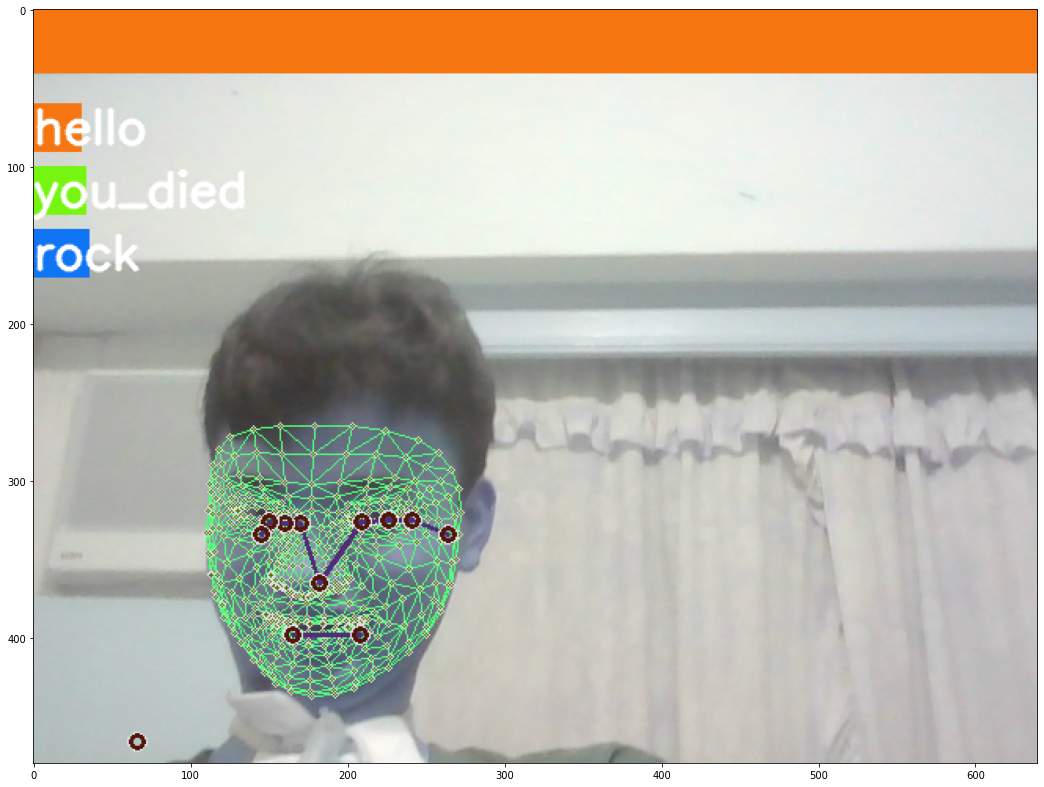

In [64]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

## shape
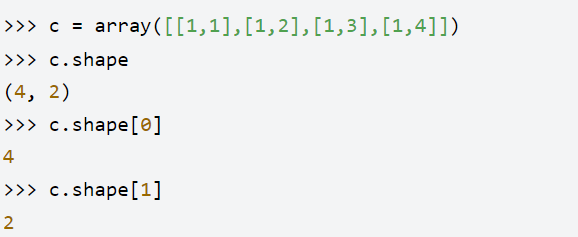

## np.expand_dims(x,axis)
把x放到axis軸上
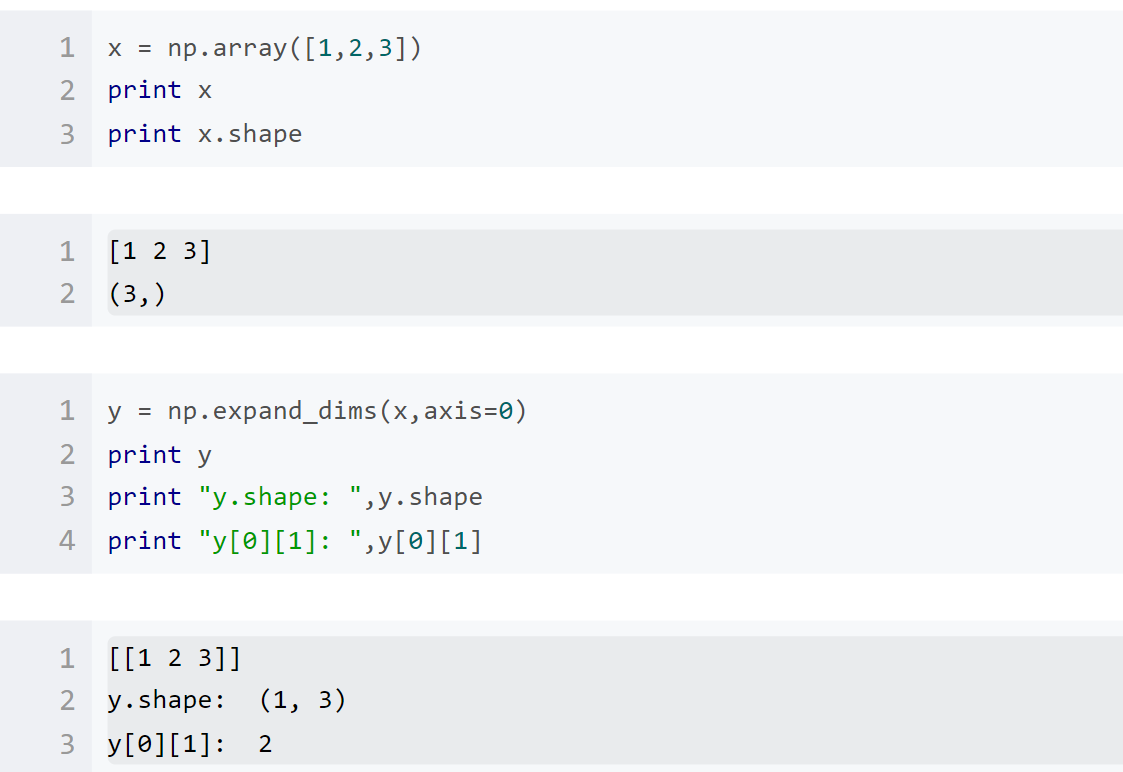

## hint:x_test.shape -> 30x1662
## but 我們要的是1 x 30 x 1662 in order to 一次放30個seqence而非一次一個


## sequence為30 x 1662的matrix
## np.expand_dims(sequence, axis=0)為1 x 30 x 1662的matrix

In [67]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
video_path=0
cap = cv2.VideoCapture(video_path)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        # openpose 
        #  keypoints = save.txt
        sequence.append(keypoints)
        sequence = sequence[-30:] #put後面30個new data update
        
        if len(sequence) == 30:
#             1 * 30
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]: #代表換下一個action
                            sentence.append(actions[np.argmax(res)]) #切換action
                    else:
                        sentence.append(actions[np.argmax(res)]) #first direct append to end

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
rock
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello


In [16]:
import json
import numpy as np
path = '183.txt'
f = open(path, 'r')
op = json.load(f)
op = json.loads(op)
# np.array(op[0]).flatten()
y=np.array(op[0]).flatten()
# y.shape[0]
y.shape
# dict = json.loads(json_input)
# numpy_2d_arrays = [np.array(ring) for ring in dict["rings"]]

(75,)

In [1]:
path = '183.txt'
f = open(path, 'r')
print(f.read())

"[[[854.7634887695312, 351.2684326171875, 0.9113865494728088], [952.6829223632812, 431.4759521484375, 0.7697786688804626], [870.318359375, 447.208251953125, 0.6770897507667542], [891.9205322265625, 603.907958984375, 0.10314373672008514], [0.0, 0.0, 0.0], [1042.78857421875, 413.9134216308594, 0.6684265732765198], [1121.1048583984375, 554.89111328125, 0.7166497707366943], [1056.396240234375, 652.8778686523438, 0.7018653154373169], [1001.6231079101562, 715.6104736328125, 0.2518307864665985], [950.6873168945312, 715.6331787109375, 0.1651889532804489], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1058.4642333984375, 701.8695068359375, 0.23953618109226227], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [856.6102905273438, 329.6532897949219, 0.1701592355966568], [872.2875366210938, 325.73828125, 0.8297038674354553], [0.0, 0.0, 0.0], [942.8029174804688, 327.6560363769531, 0.8151686787605286], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], [[276.7090148925781, 